# **DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION** #GRIPJAN21
### Author: Harshpreet Kaur


##  TASK 2: Prediction using Unsupervised ML

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
We will use K-Means Clustering Algorithm for this task.

### Importing all the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get the dataset

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

###  Converting dataset into readable form ie rows and columns using dataframe fuction

In [3]:
iris = pd.DataFrame(dataset.data, columns = dataset.feature_names)
#print the first few rows
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# total no of rows and columns
iris.shape

(150, 4)

In [5]:
# check for null values
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Therefore, the Iris dataset consists of 4 features (sepal length and width, petal length and width) and 3 species of iris (setosa, versicolor and virginica)

In [6]:
X = dataset.data
y = dataset.target

### Applying the K-Means Algorithm to find the optimum number of clusters

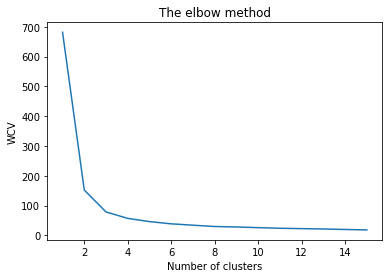

In [7]:
from sklearn.cluster import KMeans

# Experimenting with some values of 'K' to deduce the optimal value

wcv = []

for i in range(1, 16):
    km = KMeans(n_clusters = i)
    km.fit(X)
    wcv.append(km.inertia_) # calculates wcv

# Now plotting a graph which shows us the 'elbow' i.e. a point after the graph changes from exponential to linear
    
plt.plot(range(1, 16), wcv)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCV') # within cluster variation also known as with cluster sum of squares
plt.show()


**From the above graph, we could clearly see that the elbow point is 3 which is the number of optimum clusters**

In [14]:
# Creating the kmeans classifier
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

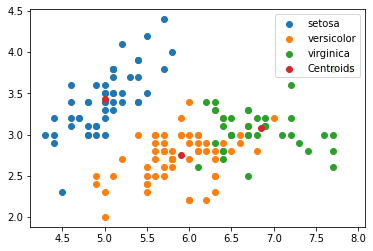

In [33]:
# visualizing the clusters

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], label = 'setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], label = 'versicolor')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], label = 'virginica')

# Plotting the centroids. This time we're going to use the cluster centres 

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], label = 'Centroids')
plt.legend(loc='upper right') 
plt.show()

## Therefore, Task 2 is complete

## Thank you !!